# Problem statement

The given data contains the consumer complaints about consumer financial products. The exploration of detail might help the user to select the right product in right bank located in different states of united state.

The solution provides the various exploratory data analysis on the dataset also provides some of the noise reduction techniques.
This will help furthe visulization of the data we have.

The clustering model chosen will be used to find how many similar complaints are there in relation to the same bank or service or product.



In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


import plotly
import plotly.express as px

import plotly.graph_objs as go

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

import warnings
warnings.filterwarnings('ignore')

In [15]:
consumer_data= pd.read_csv('../Assignment2/Assignment 5/Consumer_Complaints.csv_Consumer_Complaints.csv')

In [17]:
consumer_data_copy = consumer_data.copy()

### Verify the first and last few records and also some random sample 

In [19]:
consumer_data.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [20]:
consumer_data.tail(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
670593,11/16/2016,Credit reporting,NaN,Incorrect information on credit report,Reinserted previously deleted info,NaN,NaN,Equifax,NV,895XX,NaN,NaN,Web,11/16/2016,In progress,Yes,NaN,2211891
670594,10/26/2016,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,We purchased our home in XX/XX/XXXX at the pea...,Company has responded to the consumer and the ...,Citibank,UT,847XX,NaN,Consent provided,Web,10/26/2016,Closed with explanation,Yes,Yes,2179768
670595,11/17/2016,Credit reporting,NaN,Incorrect information on credit report,Personal information,NaN,NaN,Equifax,TN,37174,Servicemember,NaN,Web,11/17/2016,Closed with explanation,Yes,Yes,2212094
670596,09/22/2016,Credit card,NaN,Closing/Cancelling account,NaN,I have had an American Express card for over t...,NaN,Amex,FL,322XX,NaN,Consent provided,Web,09/22/2016,Closed with explanation,Yes,NaN,2126003
670597,08/13/2016,Consumer Loan,Installment loan,Managing the loan or lease,NaN,NaN,NaN,BancorpSouth Bank,MS,39301,NaN,Consent not provided,Web,09/07/2016,Closed with explanation,Yes,No,2062419


In [21]:
consumer_data.sample(5,random_state=50)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
306107,05/16/2014,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,FL,33484,NaN,NaN,Fax,05/19/2014,Closed with monetary relief,Yes,No,855237
329135,01/03/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,ERC,CA,96001,NaN,NaN,Web,01/03/2015,Closed with non-monetary relief,Yes,No,1179508
76866,08/21/2015,Credit card,NaN,Other,NaN,There is a credit card showing up on my credit...,NaN,Capital One,FL,336XX,NaN,Consent provided,Web,08/21/2015,Closed with non-monetary relief,Yes,No,1530005
511456,01/02/2016,Credit reporting,NaN,Credit reporting company's investigation,No notice of investigation status/result,I submitted a dispute with XXXX XXXX and Exper...,Company chooses not to provide a public response,Experian,TX,773XX,NaN,Consent provided,Web,01/02/2016,Closed with non-monetary relief,Yes,Yes,1724870
512453,01/24/2016,Consumer Loan,Installment loan,Shopping for a loan or lease,NaN,I RECEIVED A NOTICE OF ADVERSE ACTION FROM AN ...,NaN,Avant Credit Corporation,CA,940XX,NaN,Consent provided,Web,01/28/2016,Closed with explanation,Yes,No,1755453


In [22]:
consumer_data.columns = consumer_data.columns.str.title()

## Exploratory data analysis

1. Top 15 issues
2. Top 15 sub issues
3. Top 15 companies
4. Month in which most complaints received
5. Day of the week in which most complaints received
6. Common response from the companies
7. States which received most complaints
8. Medium from which complaints received
9. Consumers that disputed the company resoponse
10. Complaints belong to the state

### 1. Top 15 issues

In [27]:
sns.set(style='white')
consumer_data['Issue'].str.strip("'").value_counts()[0:15].iplot(kind='bar',title='Top 15 issues',fontsize=14,color='orange')

### 2. Top 15 sub issues

In [30]:
consumer_data['Sub-Issue'].str.strip("'").value_counts()[0:15].iplot(kind ='bar',
                                                                     title='Top 15 Sub Issues',fontsize=14,color='#9370DB')

### 3. Top 15 companies

In [32]:
consumer_data['Company'].str.strip("'").value_counts()[0:15].iplot(kind='bar',
                                                          title='Top 15 Company',fontsize=14,color='purple')

### 4. Month in which most complaints received

In [72]:
from datetime import datetime

# extract the date information
consumer_data['Date']           = pd.to_datetime(consumer_data['Date Received'])
consumer_data['Year']           = consumer_data['Date'].dt.year
consumer_data['Month']          = consumer_data['Date'].dt.month_name()
consumer_data['Week_Days']      = consumer_data['Date'].dt.day_name()
consumer_data["MonthOfTheYear"] = consumer_data.Year.astype(str).str.cat(consumer_data.Month.astype(str), sep='-')

In [80]:
pd.crosstab(consumer_data['Year'],consumer_data['Month']).iplot(kind='bar',barmode='group',
                                                        title='Number of Complaints per Month')

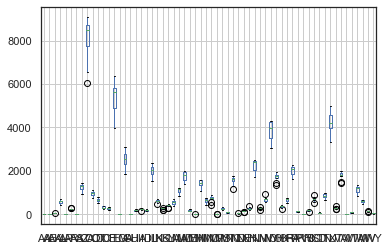

In [79]:
consumer_data['Month_box'] = consumer_data['Date'].map(lambda t: t.month)
boxplotdata = consumer_data.groupby(['Month_box', 'State']).size().unstack()

#print(boxplotdata)
boxplotdata.boxplot()
plt.show()

### 5. Day of the week in which most complaints received

In [54]:
consumer_data['Week_Days'].value_counts().iplot(kind ='bar',title ='Number of Complaints per Weekday', color='rgb(30,100,100)')

### 6. Common response from the companies

In [57]:
grouped = consumer_data.groupby(['Company Response To Consumer']).size()
pie_chart = go.Pie(labels=grouped.index,values=grouped,
                  title='Company Response to the Customer')
iplot([pie_chart])

### 7.  States which received most complaints

In [59]:
states = consumer_data['State'].value_counts()

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = states.index,
    z = states.values,
    locationmode = 'USA-states',
    text = states.index,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(254,254,254)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Complaints")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Complaints by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(100,149,237)'),
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

### 8. Medium from which complaints received

In [61]:
pd.crosstab(consumer_data['Timely Response?'],consumer_data['Submitted Via']).iplot(kind='bar',
                                                                                    title='Company Response to the Customer')

### 9. Consumers that disputed the company resoponse

In [91]:
pd.crosstab(consumer_data['Timely Response?'], consumer_data['Consumer Disputed?']).iplot(kind='bar',
                                                                    title ='Timely Response vs Consumer Disputed')

### 10. Complaints belong to the state

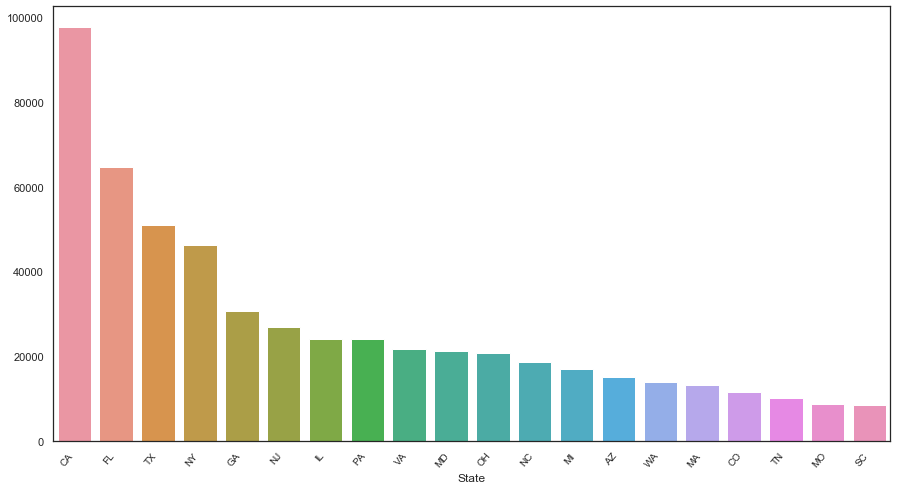

In [92]:
gp_state = consumer_data.groupby('State')
plt.figure(figsize = (15,8))
plt.xticks(rotation="50", ha="right", size = 10)
state_count = gp_state.State.count().sort_values(ascending=False)
sns.barplot(state_count.index[0:20], state_count.values[0:20])

## Noise reduction
#### Verify the missing values and fill with appropriate values


In [98]:
consumer_data.isnull().mean().round(4)*100

Date Received                    0.00
Product                          0.00
Sub-Product                     29.56
Issue                            0.00
Sub-Issue                       59.76
Consumer Complaint Narrative    82.90
Company Public Response         78.35
Company                          0.00
State                            0.79
Zip Code                         0.79
Tags                            85.87
Consumer Consent Provided?      68.96
Submitted Via                    0.00
Date Sent To Company             0.00
Company Response To Consumer     0.00
Timely Response?                 0.00
Consumer Disputed?               0.00
Complaint Id                     0.00
Date                             0.00
Year                             0.00
Month                            0.00
Week_Days                        0.00
MonthOfTheYear                   0.00
Month_box                        0.00
dtype: float64

In [ ]:
mode_value= consumer_data['Consumer Disputed?'].mode()
consumer_data['Consumer Disputed?'].fillna(mode_value[0], inplace=True)
consumer_data['Consumer Disputed?'].isnull().fillna(mode_value[0],inplace =True)